In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from IPython.display import display

from keras.layers import Input, Dense, Dropout, Activation, Conv1D, MaxPooling1D, Flatten
from keras.optimizers import SGD
from keras.models import Sequential, Model
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau

In [2]:
def construct_model(num_features, num_classes, weights=None):
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=20, strides=1, padding='valid',
    input_shape=(num_features, 1)))

    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Conv1D(filters=128, kernel_size=10, strides=1, padding='valid'))
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size=10))
    model.add(Flatten())
    model.add(Dense(200))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    model.add(Dense(20))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    model.summary()

    model.compile(loss='categorical_crossentropy',
                optimizer=SGD(),
                metrics=['accuracy'])

    if weights:
        model.load_weights(weights)

    return model

# P1

In [3]:
tc_test = np.load('data/tc_test.npy')
tc_test_labels = np.load('data/tc_test_labels.npy')

In [4]:
p1_model = construct_model(tc_test.shape[1], tc_test_labels.shape[1], 
                           weights='p1.autosave.model.h5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 60464, 128)        2688      
_________________________________________________________________
activation (Activation)      (None, 60464, 128)        0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 60464, 128)        0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 60455, 128)        163968    
_________________________________________________________________
activation_1 (Activation)    (None, 60455, 128)        0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 6045, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 773760)            0

In [6]:
score = p1_model.evaluate(tc_test, tc_test_labels, verbose=0)
score

[0.13593116402626038, 0.970370352268219]

In [7]:
probs = p1_model.predict(tc_test, verbose=0)

In [20]:
preds = np.argmax(preds, axis=1)
true_labels = np.argmax(tc_test_labels, axis=1)

In [25]:
cf_matrix = confusion_matrix(true_labels, preds)

<AxesSubplot:>

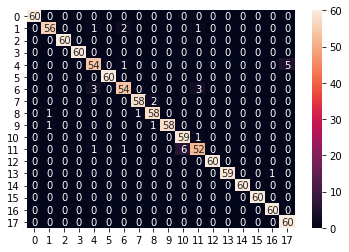

In [26]:
sns.heatmap(cf_matrix, annot=True)

The test error is 0.13593116402626038, and the accuracy is 0.970370352268219. We've shown the confusion matrix above.

# P2